In [6]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.1/266.1 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.6 MB/s eta 0:00:00


In [1]:
!pip install diffusers
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00


In [1]:
from image_utils import imageToTensor

In [2]:
from datasets import load_dataset
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from torch.utils.data import Dataset
from datasets import load_dataset
import torchvision.transforms as transforms

class CustomCartoonBlipCaptionsDataset(Dataset):
    def __init__(self, split='train', transform=None):
        # Load the dataset
        self.dataset = load_dataset("rassibassi/sample_mnist", split=split)
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image = self.dataset[idx]["image"]
        caption = self.dataset[idx]["label"]
        if(caption ==0):
          caption = torch.tensor([1 , 0 , 0 , 0, 0 , 0 , 0 , 0 , 0 , 0  ])
        elif(caption == 1):
          caption = torch.tensor([0 , 1 , 0 , 0, 0 , 0 , 0 , 0 , 0 , 0  ])
        elif(caption == 2):
          caption = torch.tensor([0 , 0 , 1 , 0, 0 , 0 , 0 , 0 , 0 , 0  ])
        elif(caption == 3):
          caption = torch.tensor([0 , 0 , 0 , 1, 0 , 0 , 0 , 0 , 0 , 0  ])
        elif(caption == 4):
          caption = torch.tensor([0 , 0 , 0 , 0, 1 , 0 , 0 , 0 , 0 , 0  ])
        elif(caption == 5):
          caption = torch.tensor([0 , 0 , 0 , 0, 0 , 1 , 0 , 0 , 0 , 0  ])
        elif(caption == 6):
          caption = torch.tensor([0 , 0 , 0 , 0, 0 , 0 , 1 , 0 , 0 , 0  ])
        elif(caption == 7):
          caption = torch.tensor([0 , 0 , 0 , 0, 0 , 0 , 0 , 1 , 0 , 0  ])
        elif(caption == 8):
          caption = torch.tensor([0 , 0 , 0 , 0, 0 , 0 , 0 , 0 , 1 , 0  ])
        elif(caption == 9):
          caption = torch.tensor([0 , 0 , 0 , 0, 0 , 0 , 0 , 0 , 0 , 1  ])
        # Apply transformations if provided
        if self.transform:
            image = image.convert('L')
            image = self.transform(image)
        return image, caption

# Define transformations to apply to the images

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5]),
])

# Create an instance of the custom dataset with limited samples per class
max_samples_per_class = 5
custom_dataset = CustomCartoonBlipCaptionsDataset(split='test', transform=transform)

# Access a sample from the dataset
sample_image, sample_caption = custom_dataset[1]
print(sample_image.shape)  # Print the shape of the image tensor
print(sample_caption)      # Print the caption associated with the image


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


torch.Size([1, 32, 32])
tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])


In [4]:
from models import Diffusion

In [5]:
import torch
device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cuda


In [6]:
d = Diffusion(device )

In [7]:
!wandb login

wandb: Currently logged in as: gorgewageh302. Use `wandb login --relogin` to force relogin


In [8]:
import wandb
import random

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="mnist dmt",

    # track hyperparameters and run metadata
    config={
    "learning_rate": 1e-04,
    "architecture": "Unet",
    "dataset": "mnist",
    "epochs": 100,
    }
)

wandb: Currently logged in as: gorgewageh302. Use `wandb login --relogin` to force relogin


In [ ]:
d.train(custom_dataset ,use_wandb = True,generateAfterEpoch=2, learning_rate =1e-04 ,batch_size=10,epochs=50)

In [14]:
d.savePoint()

50it [00:02, 20.66it/s]


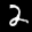

In [19]:
d.generate(2)